# MLfajnySIECIneuronoweMOCNErzeczyTUTAJtwojaSTARAliteralniePAN

In [2]:
import csv 
import pandas as pd 
import numpy as np
from tensorflow.keras import models, layers
from sklearn.preprocessing import RobustScaler
import joblib

In [3]:
def generateRandomInt(mini, maks): 
  return np.random.randint(mini, maks)

def generateRandomFloat(mini, maks): 
  return np.random.uniform(mini, maks) 


DATA_CNT = 10000

FILE = "data.csv"
headers = [ 
  "Populacja", 
  "Koordynat x", 
  "Koordynat y", 
  "Powierzchnia", 
  "Procent dzieci", 
  "Procent mlodziez", 
  "Procent doroslych", 
  "Procent emerytow", 
  "Procent mezczyzn", 
  "Procent ludzi z wyksztalceniem wyzszym", 
  "Pieniadze wydane na marketing", 
  "Pieniadze zarobione"
  ]

# with open(FILE, mode="w", newline="") as file: 
#   writer = csv.writer(file) 
#   writer.writerow(headers) 
  # for i in range(DATA_CNT): 
  #   row = [] 
  #   row.append(generateRandomInt(1, 1800000)) # populacja
  #   row.append(generateRandomFloat(0, 100)) # koordynat x
  #   row.append(generateRandomFloat(0, 100)) # koordynat y
  #   row.append(generateRandomInt(3, 500)) # powierzchnia
  #   kid_percent = generateRandomFloat(0, 0.5)
  #   teen_percent = generateRandomFloat(0, 0.5-kid_percent)
  #   adult_percent = generateRandomFloat(0, 0.5)
  #   pensioner_percent = generateRandomFloat(0, 0.5-adult_percent)
  #   row.append(kid_percent) # procent dzieci
  #   row.append(teen_percent) # procent mlodziezy
  #   row.append(adult_percent) # procent doroslych
  #   row.append(pensioner_percent) # procent emerytow
  #   row.append(generateRandomFloat(0, 0.6)) # procent mezczyzn
  #   row.append(generateRandomFloat(0, 0.4)) # procent ludzi z wyksztalceniem wyzszym
  #   row.append(generateRandomInt(100, 1000)) # procent ludzi z wyksztalceniem wyzszym
  #   row.append(generateRandomInt(1000, 10000)) # pieniadze wydane na marketing
  #   writer.writerow(row) 




In [4]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
SCALE = 1e6

df = pd.read_csv('data/data2.csv') 
y = df['Pieniadze zarobione']/SCALE

# y = df['Pieniadze zarobione']
X = df.drop(columns=['Pieniadze zarobione'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# scaler = StandardScaler() 
scaler = RobustScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [5]:
model = models.Sequential([ 
    layers.InputLayer(shape=(X_train.shape[1],)), 
    layers.Dense(128, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(32, activation='relu'), 
    layers.Dense(16, activation='relu'), 
    layers.Dense(1)
])


model.compile(optimizer='rmsprop', 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error']) 



In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_split=0.2) 


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1055 - mean_absolute_error: 0.2105 - val_loss: 0.0065 - val_mean_absolute_error: 0.0637
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - mean_absolute_error: 0.0596 - val_loss: 0.0069 - val_mean_absolute_error: 0.0716
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - mean_absolute_error: 0.0469 - val_loss: 0.0026 - val_mean_absolute_error: 0.0403
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0390 - val_loss: 0.0025 - val_mean_absolute_error: 0.0429
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - mean_absolute_error: 0.0348 - val_loss: 0.0015 - val_mean_absolute_error: 0.0317
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0313 - val_loss: 0.0011 - val_mean_absolute_error: 0.0276
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0

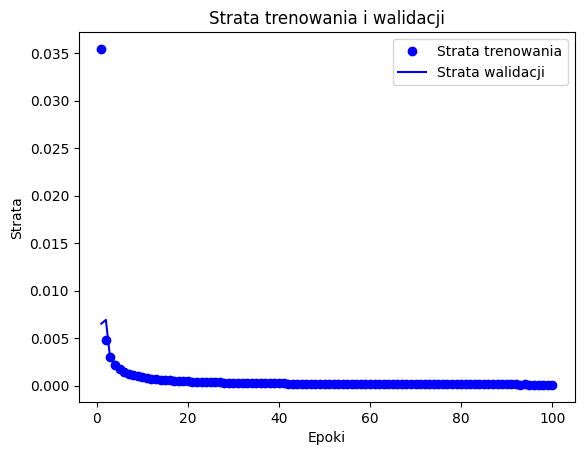

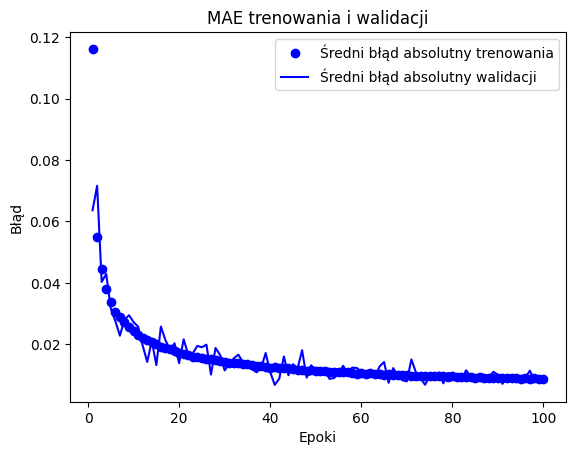

In [9]:
history_dict = history.history
history_dict.keys()


import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
plt.clf()
mae_values = history_dict['mean_absolute_error']
val_mae_values = history_dict['val_mean_absolute_error']
plt.plot(epochs, mae, 'bo', label='Średni błąd absolutny trenowania')
plt.plot(epochs, val_mae, 'b', label='Średni błąd absolutny walidacji')
plt.title('MAE trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Błąd')
plt.legend()
plt.show()

# loss, mae = model.evaluate(X_test, y_test)
# print(f"Mean Absolute Error on test data: {mae}")

In [8]:

X = pd.read_csv('test.csv')
X = X.drop(columns=['Nazwa miasta'])

X_new_scaled = scaler.transform(X)
# print(X)
predictions = model.predict(X_new_scaled)*SCALE
print(predictions)

model.save('model.h5')
joblib.dump(scaler, 'scaler.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'